# Creating Dataset 📸📁


### Taking images using opencv, preprocessing them, and then storing them in numpy array

----------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------

### 1. Installing Libraries ✔️✔️

In [1]:
import mediapipe as mp
import cv2
import numpy as np
import uuid
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

### 2. Draw Hands
<img src= https://google.github.io/mediapipe/images/mobile/hand_landmarks.png />

---------------------------------------------------------------------------------------------------------------------------------------------

## 3. Collecting Images for Dataset Creation 🖼️

In [ ]:
# Initializing empty numpy array to store image dataset
data = np.empty(shape=(1,(300*300)+1), dtype=np.uint8)

In [4]:
# FUNCTION TO Store Images in DATASET
def store(img, label):
    global data
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray.flatten() #1 row 9 columns
    flat = np.append(gray,label)
    data = np.append(data , [flat] , axis=0)
    print("Image Saved")

In [5]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands:
    while cap.isOpened():

        ret, frame = cap.read()
        
        #BGR to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Set flag to False
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to True
        image.flags.writeable = True
        
        # RGB to BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
            
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                x = [landmark.x for landmark in hand.landmark]
                y = [landmark.y for landmark in hand.landmark]

                center = np.array([np.mean(x)*image.shape[1], np.mean(y)*image.shape[0]]).astype('int32') #center of hand for rectangle
                start_point = (center[0]-150,center[1]-150)
                end_point = (center[0]+150,center[1]+150)
                
                width = end_point[0] - start_point[0]
                height = end_point[1] - start_point[1]

                cv2.circle(image, tuple(center), 10, (255,0,0), 1)  #for checking the center 
                cv2.rectangle(image, (center[0]-150,center[1]-150), (center[0]+150,center[1]+150), (255,0,0), 1)
                img = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8) #CANVAS
                
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=4)
                                         )
                mp_drawing.draw_landmarks(img, hand, mp_hands.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color=(255,0,0), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius=4)
                                         )
                img = img[start_point[1]:end_point[1],start_point[0]:end_point[0],:] 
     
        
        cv2.imshow('Hand Tracking', image)
        k = cv2.waitKey(10)
        
        if k == ord('q'):
            break
        elif k == ord('A'):
            print("Saving image A")
            store(img, 0)
        elif k == ord('B'):
            print("Saving image B")
            store(img, 1)
        elif k == ord('C'):
            print("Saving image C")
            store(img, 2)
        elif k == ord('D'):
            print("Saving image D")
            store(img, 3)
        elif k == ord('E'):
            print("Saving image E")
            store(img, 4)
        elif k == ord('F'):
            print("Saving image F")
            store(img, 5)
        elif k == ord('G'):
            print("Saving image G")
            store(img, 6)
        elif k == ord('H'):
            print("Saving image H")
            store(img, 7)
        elif k == ord('I'):
            print("Saving image I")
            store(img, 8)
        elif k == ord('J'):
            print("Saving image J")
            store(img, 9)
        elif k == ord('K'):
            print("Saving image K")
            store(img, 10)
        elif k == ord('L'):
            print("Saving image L")
            store(img, 11)
        elif k == ord('M'):
            print("Saving image M")
            store(img, 12)
        elif k == ord('N'):
            print("Saving image N")
            store(img, 13)
        elif k == ord('O'):
            print("Saving image O")
            store(img, 14)
        elif k == ord('P'):
            print("Saving image P")
            store(img, 15)
        elif k == ord('Q'):
            print("Saving image Q")
            store(img, 16)
        elif k == ord('R'):
            print("Saving image R")
            store(img, 17)
        elif k == ord('S'):
            print("Saving image S")
            store(img, 18)
        elif k == ord('T'):
            print("Saving image T")
            store(img, 19)
        elif k == ord('U'):
            print("Saving image U")
            store(img, 20)
        elif k == ord('V'):
            print("Saving image V")
            store(img, 21)
        elif k == ord('W'):
            print("Saving image W")
            store(img, 22)
        elif k == ord('X'):
            print("Saving image X")
            store(img, 23)
        elif k == ord('Y'):
            print("Saving image Y")
            store(img, 24)
        elif k == ord('Z'):
            print("Saving image Z")
            store(img, 25)

cap.release()
cv2.destroyAllWindows()

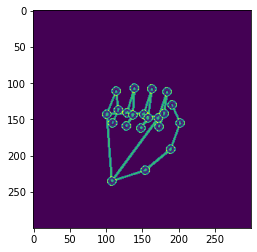

In [7]:
A = data[4][:-1]
A=np.reshape(A, (300,300))
plt.imshow(A)

(90000,)


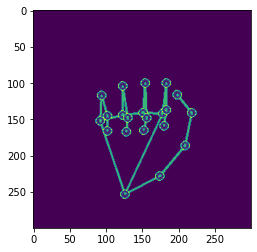

In [62]:
A = data[3][:-1]
print(A.shape)
A=np.reshape(A, (300,300))
plt.imshow(A)

In [ ]:
# Saving the images collected in a numpy file
np.save('signLanguage-Dataset', data[1:])

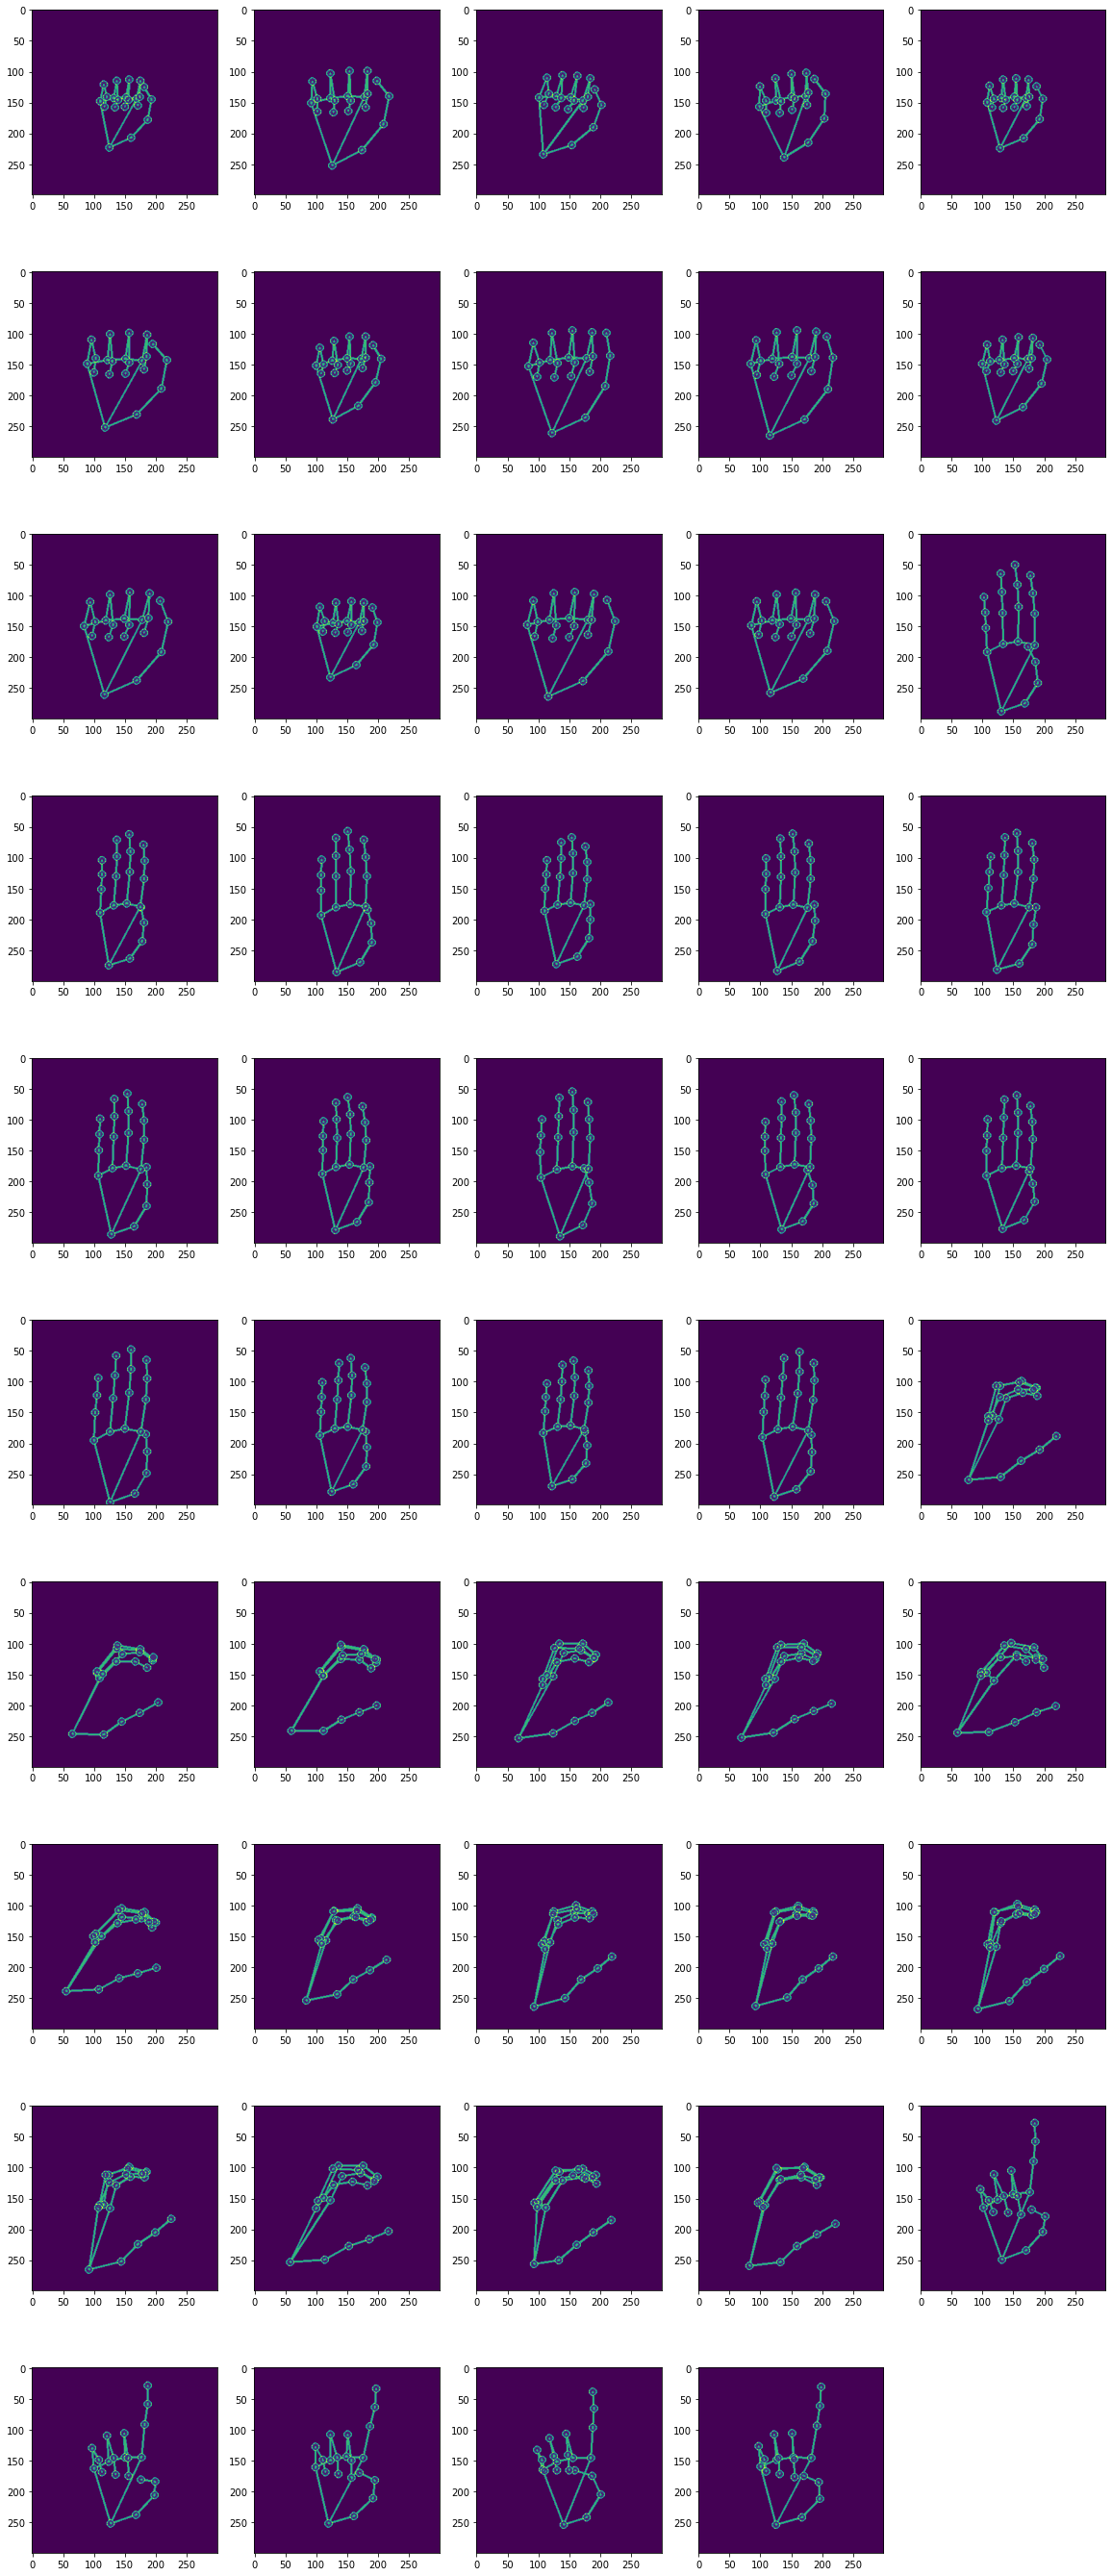

In [31]:
data = np.load('signLanguage-Dataset-15.npy')
f = plt.figure(figsize=(20,400))
n: int = len(data)-1
    
for idx,image in enumerate(data[1:50]):
    img = image[:-1]
    label = image[-1]
    img=np.reshape(img, (300,300))
    f.add_subplot(80, 5, idx + 1)
    plt.imshow(img)

---------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------